In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(20,10)

In [2]:
df1 =pd.read_csv('D:\\bangalore_housing.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','availability','society','balcony'],axis =1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2.shape

(13320, 5)

In [9]:
df3= df2.dropna()
df3.shape

(13246, 5)

In [10]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
 df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
type(df3.size)

numpy.int32

In [15]:
df3['bhk']= df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

<ipython-input-15-2a055d65ccc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [21]:
type(df3.bhk)

pandas.core.series.Series

In [20]:
df3['bhk']=pd.to_numeric(df3.bhk)

<ipython-input-20-5082f4700258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=pd.to_numeric(df3.bhk)


In [22]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
df4 = df3[df3['bhk']<20]
df4.shape

(13244, 6)

In [24]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def convert_sqft(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[-1]))/2
    try:
        return float(x)
    except:
        return None

In [30]:
df5= df4.copy()
df5['total_sqft'] =df5['total_sqft'].apply(convert_sqft)

In [31]:
df5['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [32]:
df5['price_sqft'] = df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
df3['location'].value_counts()

Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
Williams Town            1
Sector 3 HSR Layout      1
Bahubali Nagar           1
 Bhoganhalli             1
Maruthi Extension        1
Name: location, Length: 1304, dtype: int64

In [40]:
loc_stats=df3['location'].value_counts()

In [41]:
loc_stats1 = loc_stats[loc_stats<=10]

In [43]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in loc_stats1 else x)

In [46]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [48]:
df5[df5.total_sqft/df5.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [49]:
df6 = df5[df5.total_sqft/df5.bhk>300]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [51]:
df6.shape

(12274, 7)

In [53]:
df6['price_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_sqft, dtype: float64

In [64]:
def price_outlier(x):
    df_out =pd.DataFrame()
    for key,sub_df in x.groupby('location'):
        m =np.mean(sub_df.price_sqft)
        sd = np.std(sub_df.price_sqft)
        reduced_df = sub_df[(sub_df.price_sqft>(m-sd))& (sub_df.price_sqft<(m+sd))]
        df_out =pd.concat([df_out,reduced_df],ignore_index = True)
      
    return df_out

In [65]:
df7 = price_outlier(df6)

In [66]:
df7.shape

(10016, 7)

In [67]:
 df7['price_sqft'].describe()

count    10016.000000
mean      5623.633704
std       2207.930877
min       1250.000000
25%       4245.186754
50%       5164.868323
75%       6388.415673
max      24509.803922
Name: price_sqft, dtype: float64

In [76]:
def plot_scatter(x,location):
    bhk2 = x[(x.location ==location)& (x.bhk==2)]
    bhk3 = x[(x.location ==location) & (x.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ='blue',marker = '*',label='2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green', marker = '+',label='3bhk')
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title('Location')
    plt.legend()

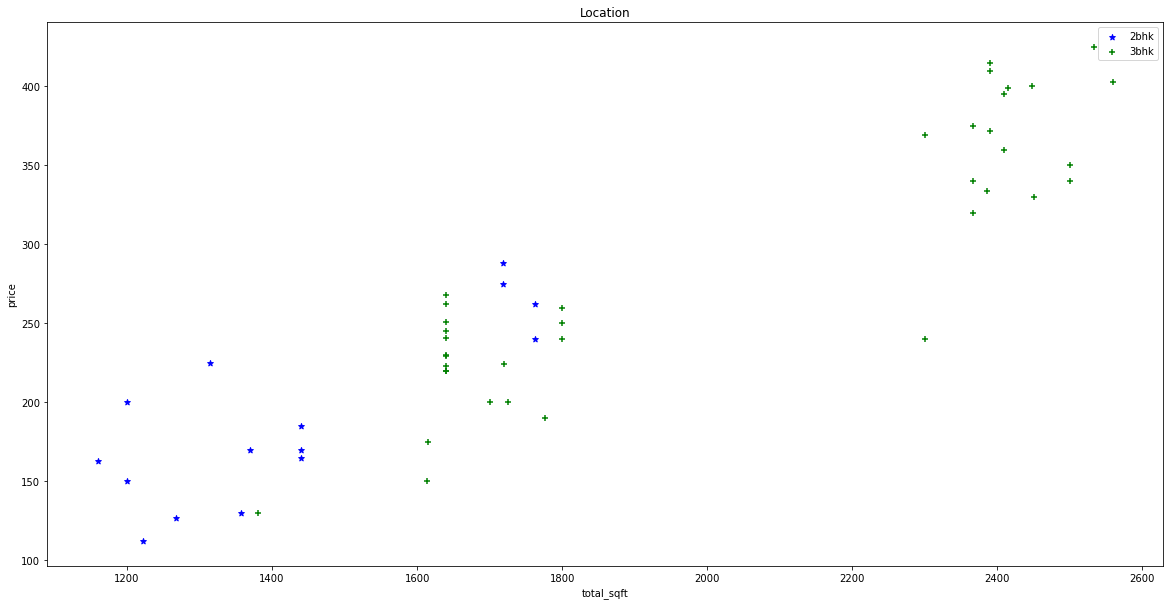

In [77]:
plot_scatter(df7,'Rajaji Nagar')

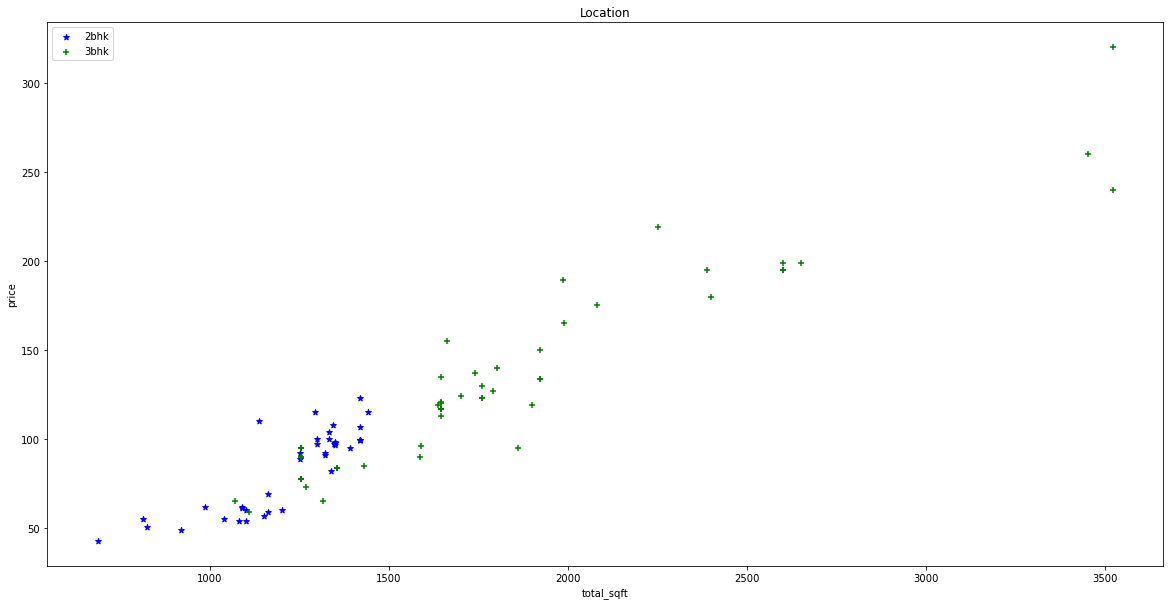

In [78]:
plot_scatter(df7,'Hebbal')

In [94]:
def remove_bhk_outlier(x):
    exclude_indices =np.array([])
    for location,location_df in x.groupby('location'):
        bhk_stats= {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
            'mean' : np.mean(bhk_df.price_sqft),
            'std'  : np.std(bhk_df.price_sqft),
            'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.price_sqft < (stats['mean'])].index.values)
            
    return x.drop(exclude_indices,axis='index')         
                

In [95]:
df8 = remove_bhk_outlier(df7)
df8.shape

(7176, 7)

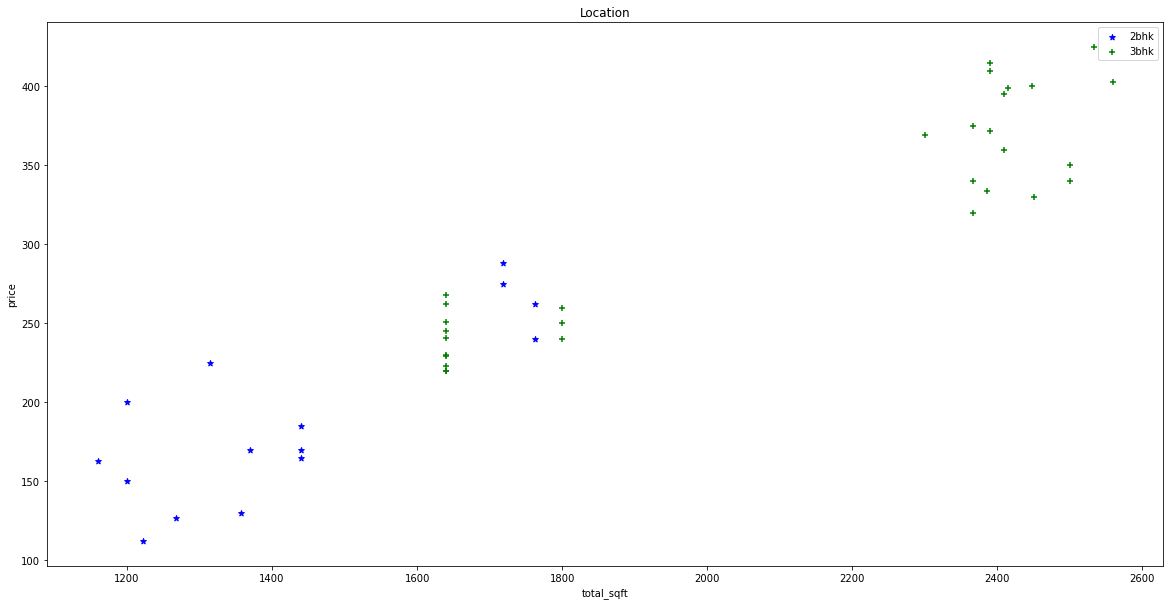

In [96]:
plot_scatter(df8,'Rajaji Nagar')

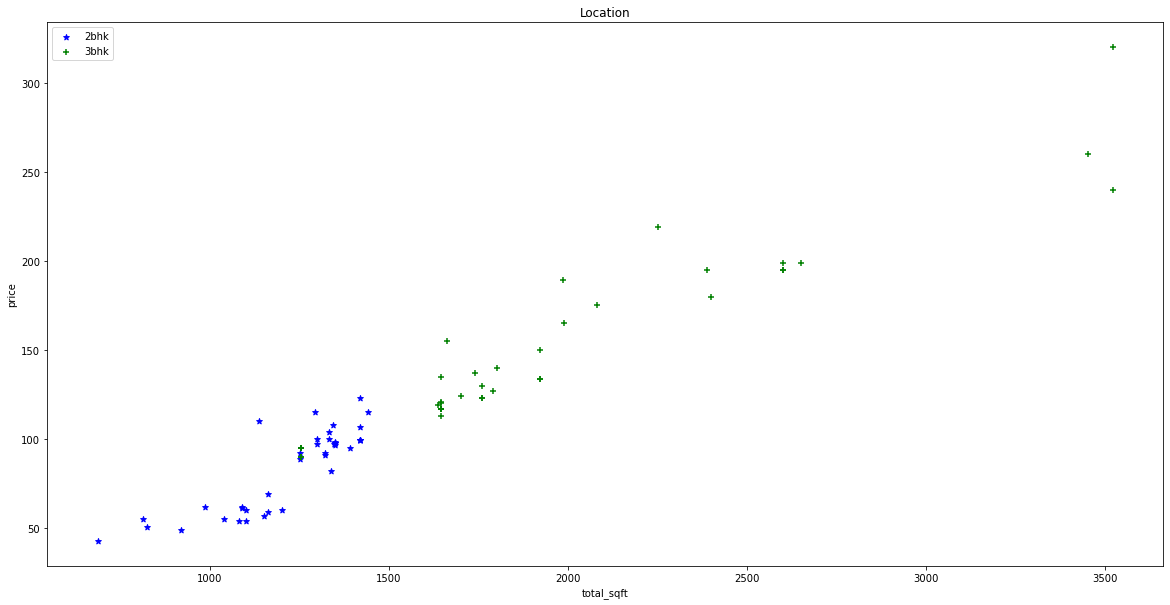

In [97]:
plot_scatter(df8,'Hebbal')

Text(0, 0.5, 'count')

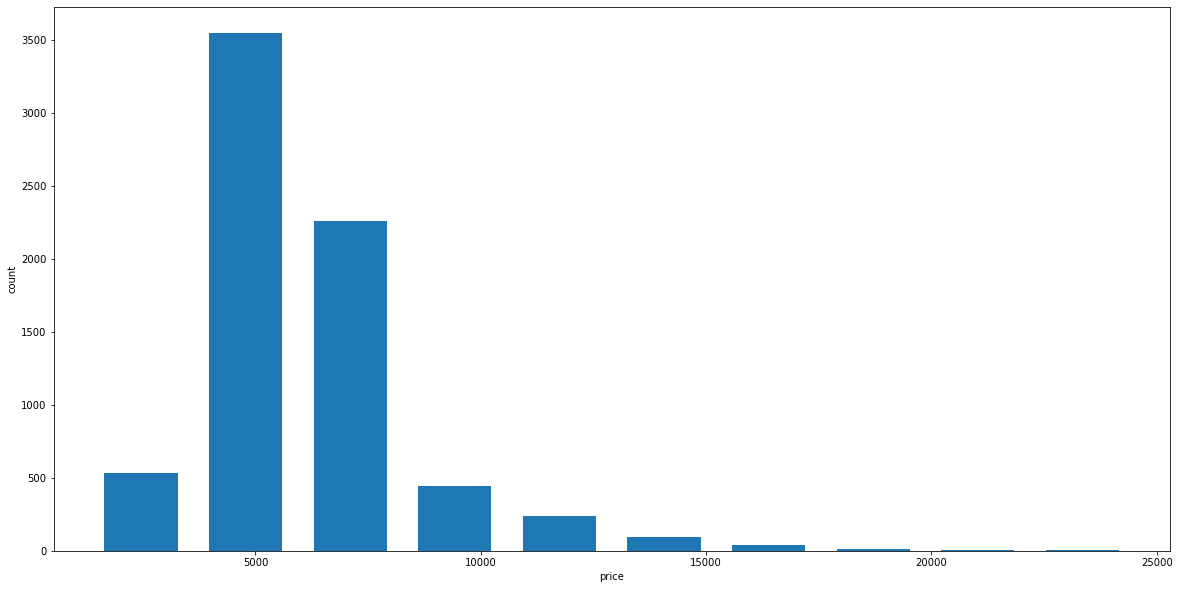

In [98]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_sqft,rwidth= 0.7)
plt.xlabel('price')
plt.ylabel('count')

Text(0, 0.5, 'count')

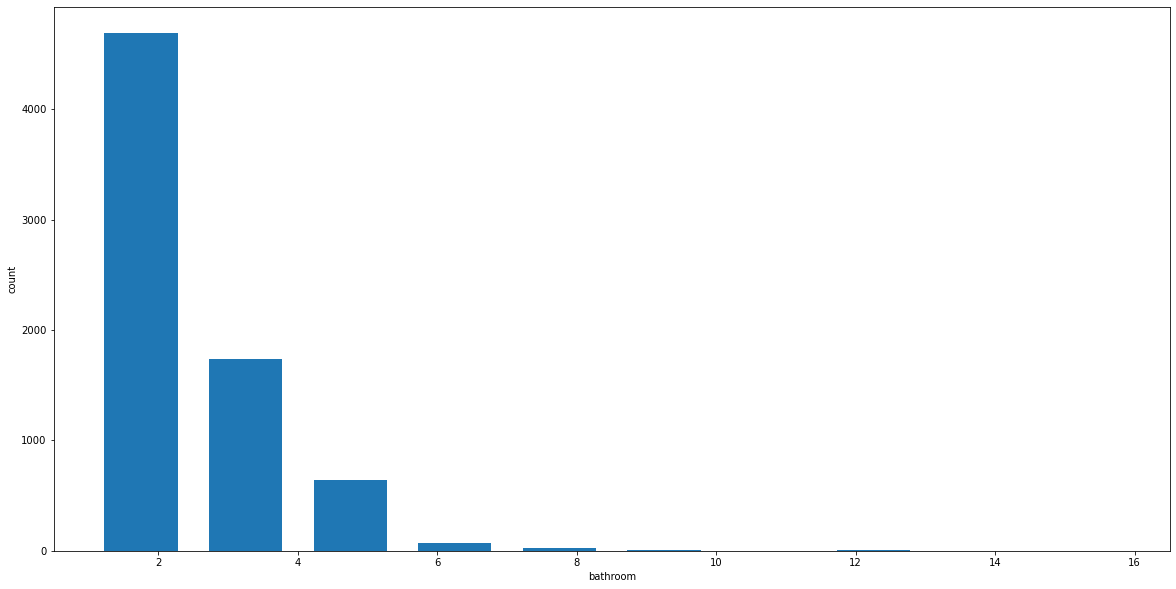

In [99]:
plt.hist(df8.bath,rwidth =0.7)
plt.xlabel('bathroom')
plt.ylabel('count')

In [101]:
df8[df8.bath> df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_sqft
1576,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5093,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6553,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8226,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [104]:
df9 =df8[df8.bhk < df8.bath+2]
df9.shape

(7150, 7)

In [105]:
df10 =df9.drop(['size','price_sqft'],axis =1)

In [107]:
dummies =pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df10 =pd.concat([df10,dummies.drop('other',axis =1)])
df10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df10.fillna(0,inplace = True)
df10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
df10.drop('location',axis =1,inplace= True)

In [127]:
df10.isna().sum()

total_sqft              0
bath                    0
price                   0
bhk                     0
 Devarachikkanahalli    0
                       ..
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 245, dtype: int64

In [128]:
y=df10.price
x= df10.drop('price',axis =1)

In [129]:
len(y)

14300

In [130]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt = train_test_split(x,y,test_size=0.2, random_state=10)

In [131]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xt,yt)
lr.score(xtt,ytt)

0.7692040970462062

In [134]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84874694, 0.81394706, 0.8072325 , 0.82994206, 0.81729868])

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

In [144]:
def best_algo(a,b):
    algos ={
        'linear regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' :  ['best','random']
            }
            
        }
        
    }
    
    
    scores =[]
    cv= ShuffleSplit(n_splits =5,test_size =0.2,random_state=0)
    for algo_name, config in algos.items():
        gs =GridSearchCV(config['model'],config['params'],cv=cv, return_train_score = False)
        gs.fit(a,b)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns =['model','best_score','best_params'])    

In [145]:
best_algo(x,y)

,model,best_score,best_params
0,linear regression,0.811799,{'normalize': False}
1,lasso,0.810047,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.677972,"{'criterion': 'mse', 'splitter': 'best'}"


In [146]:
def predict_price(location,sqft,bath,bhk):
    loc_index =np.where(x.columns==location)[0][0]
    
    p =np.zeros(len(x.columns))
    p[0] = sqft
    p[1] = bath
    p[2] = bhk
    
    if loc_index >0:
        p[loc_index]=1
     
    return lr.predict([p])[0]

In [147]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

75.36266331956224

In [148]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

70.46846478594895

In [149]:
predict_price('Indira Nagar',1000, 2, 2)

75.36266331956347

In [150]:
predict_price('Indira Nagar',1000, 3, 3)

70.46846478595015

In [151]:
import pickle
with open('Bangalore_housing_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [152]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))